In [30]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 49.2 ms


We read in the data set and take a subset of the first 20k rows, setting y to be the toxicity (target) value.

In [2]:
df = pd.read_csv('train.csv')

time: 20.5 s


In [4]:
X = df.head(20000)
y = X['target']

time: 4.27 ms


In [5]:
X = X.drop(['target'], axis=1)

time: 11.4 ms


We then do a 70:30 train test split.

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

time: 67.8 ms


Here we transform the text data into count vector and tf-idf feature representations.

In [44]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(X['comment_text'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(X_train['comment_text'])
xtest_count =  count_vect.transform(X_test['comment_text'])

time: 1.59 s


In [45]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(X['comment_text'])
xtrain_tfidf =  tfidf_vect.transform(X_train['comment_text'])
xtest_tfidf =  tfidf_vect.transform(X_test['comment_text'])

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(X['comment_text'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(X_train['comment_text'])
xtest_tfidf_ngram =  tfidf_vect_ngram.transform(X_test['comment_text'])

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(X['comment_text'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_train['comment_text']) 
xtest_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_test['comment_text']) 

time: 20.3 s


In [107]:
# RF on Count Vectors
rf = RandomForestRegressor(n_estimators=100, random_state=0)  
rf.fit(xtrain_count, y_train)  
y_pred = rf.predict(xtest_count)

time: 7min 31s


In [48]:
print("Train Score: ", round(rf.score(xtrain_count,y_train),4))
print("Test Score: ", round(rf.score(xtest_count,y_test),4))

Train Score:  0.8984
Train Score:  0.3201
time: 307 ms


In [109]:
print("Train Score: ", round(rf.score(xtrain_count,y_train),4))
print("Test Score: ", round(rf.score(xtest_count,y_test),4))

Train Score:  0.9078
Train Score:  0.2792
time: 1.67 s


In [108]:
# RF on TF-IDF Vectors
rf2 = RandomForestRegressor(n_estimators=100, random_state=0)  
rf2.fit(xtrain_tfidf, y_train)  
y_pred2 = rf2.predict(xtest_tfidf)

time: 8min 14s


In [50]:
print("Train Score: ", round(rf2.score(xtrain_tfidf,y_train),4))
print("Train Score: ", round(rf2.score(xtest_tfidf,y_test),4))

Train Score:  0.8907
Train Score:  0.296
time: 235 ms


In [110]:
print("Train Score: ", round(rf2.score(xtrain_tfidf,y_train),4))
print("Train Score: ", round(rf2.score(xtest_tfidf,y_test),4))

Train Score:  0.9019
Train Score:  0.2627
time: 1.09 s


In [51]:
# RF on TF-IDF ngram Vectors
rf3 = RandomForestRegressor(n_estimators=20, random_state=0)  
rf3.fit(xtrain_tfidf_ngram, y_train)  
y_pred2 = rf3.predict(xtest_tfidf_ngram)

time: 1min 11s


In [52]:
print("Train Score: ", round(rf3.score(xtrain_tfidf_ngram,y_train),4))
print("Train Score: ", round(rf3.score(xtest_tfidf_ngram,y_test),4))

Train Score:  0.8027
Train Score:  -0.07
time: 310 ms


In [53]:
# RF on TF-IDF character-level ngram Vectors
rf4 = RandomForestRegressor(n_estimators=20, random_state=0)  
rf4.fit(xtrain_tfidf_ngram_chars, y_train)  
y_pred2 = rf3.predict(xtest_tfidf_ngram_chars)

time: 8min 16s


In [54]:
print("Train Score: ", round(rf4.score(xtrain_tfidf_ngram_chars,y_train),4))
print("Train Score: ", round(rf4.score(xtest_tfidf_ngram_chars,y_test),4))

Train Score:  0.8767
Train Score:  0.2151
time: 435 ms


The results from using the count vectors are comparable to that of the tf-idf vectors, with less computation, so we use count vectors as our features. We now track the OOB score for n_estimators, to determine a good cut-off point, while considering the max_features.

/usr/local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr

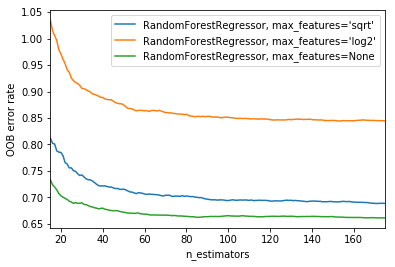

time: 33min 47s


In [98]:
from collections import OrderedDict
RANDOM_STATE = 123
ensemble_clfs = [
    ("RandomForestRegressor, max_features='sqrt'",
        RandomForestRegressor(n_estimators=100,
                               warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RandomForestRegressor, max_features='log2'",
        RandomForestRegressor(n_estimators=100,
                               warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestRegressor, max_features=None",
        RandomForestRegressor(n_estimators=50,
                               warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 175

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(xtrain_count, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))
        
# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

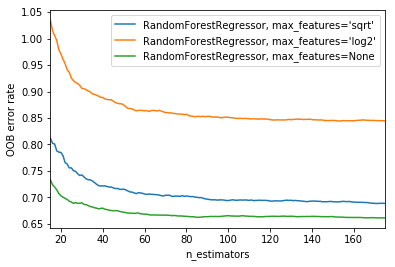

time: 1.07 s


In [103]:
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.savefig('oob.png', dpi=300)

In [102]:
plt.savefig('oob.png', dpi=300)

time: 450 ms


In [104]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['log2', 'sqrt', None]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'max_features': max_features,
               'min_samples_split': min_samples_split,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_features': ['log2', 'sqrt', None],
 'min_samples_split': [2, 5, 10, 15]}
time: 47.5 ms


In [105]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(xtrain_count, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] min_samples_split=2, max_features=None, bootstrap=True ..........
[CV] min_samples_split=2, max_features=None, bootstrap=True ..........
[CV] min_samples_split=2, max_features=None, bootstrap=True ..........
[CV] min_samples_split=2, max_features=sqrt, bootstrap=False .........
[CV] min_samples_split=2, max_features=sqrt, bootstrap=False .........
[CV] min_samples_split=2, max_features=sqrt, bootstrap=False .........
[CV] min_samples_split=2, max_features=log2, bootstrap=True ..........
[CV] min_samples_split=2, max_features=log2, bootstrap=True ..........
[CV]  min_samples_split=2, max_features=log2, bootstrap=True, total=   1.6s
[CV]  min_samples_split=2, max_features=log2, bootstrap=True, total=   1.7s
[CV] min_samples_split=2, max_features=log2, bootstrap=True ..........
[CV] min_samples_split=10, max_features=sqrt, bootstrap=False ........
[CV]  min_samples_split=2, max_features=log2, bootstrap=True, total=   1.8s
[

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.6min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'max_features': ['log2', 'sqrt', None], 'min_samples_split': [2, 5, 10, 15], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

time: 2min 17s


In [106]:
rf_random.best_params_

{'bootstrap': True, 'max_features': None, 'min_samples_split': 5}

time: 3.88 ms


In [111]:
#RF using best params and count vectorization
rfb = RandomForestRegressor(n_estimators=85, random_state=0, bootstrap=True, max_features=None, min_samples_split=5)  
rfb.fit(xtrain_count, y_train)  
y_pred_b = rfb.predict(xtest_count)

time: 5min 47s


In [76]:
print("Train Score: ", round(rfb.score(xtrain_count,y_train),4))
print("Test Score: ", round(rfb.score(xtest_count,y_test),4))

Train Score:  0.8684
Test Score:  0.3364
time: 1.27 s


In [80]:
# Here we set each toxicity value to 0 or 1, based on whether the probability is >= 0.5
pred = y_pred_b
pred[pred >= 0.5] = 1
pred[pred < 0.5] = 0

time: 3.06 ms


In [83]:
# Same for the test set
y_test_round = y_test
y_test_round[y_test_round >= 0.5] = 1
y_test_round[y_test_round < 0.5] = 0

time: 12.4 ms


In [84]:
# Calculate ROC-AUC and plot
import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)

time: 5.58 ms


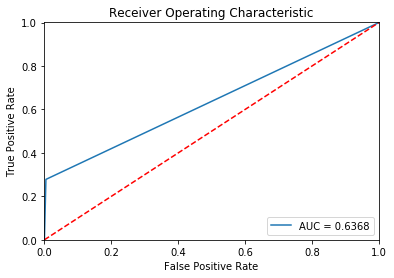

time: 262 ms


In [85]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

In [97]:
rfb.feature_importances_

array([0.00000000e+00, 4.86408755e-06, 2.76589166e-05, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

time: 214 ms
